## Name: Jatin khudania
## My This project based on the sale prediction based on Advertsing of Tv,Radio,Newspaper sales.

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv(r"C:\Users\HIMANI\AppData\Local\Programs\Python\Python38-32\Sales prediction\Sales Pridiction .csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         199 non-null    float64
 1   radio      199 non-null    float64
 2   newspaper  199 non-null    float64
 3   sales      199 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
import seaborn as sns

C:\Users\HIMANI\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


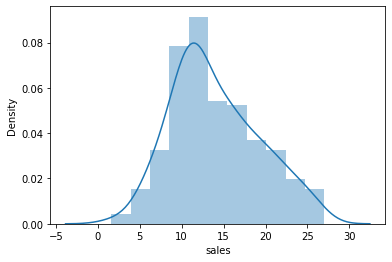

In [10]:
sns.distplot(data.sales);

C:\Users\HIMANI\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


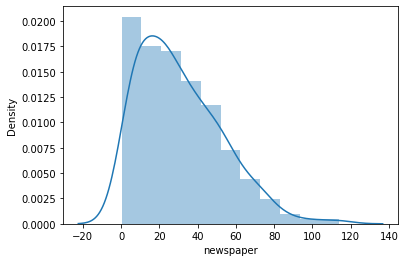

In [12]:
sns.distplot(data.newspaper);

C:\Users\HIMANI\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


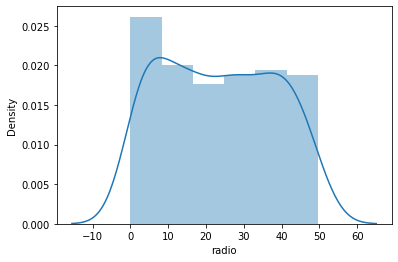

In [13]:
sns.distplot(data.radio);

C:\Users\HIMANI\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


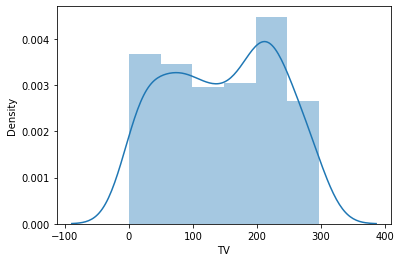

In [14]:
sns.distplot(data.TV);

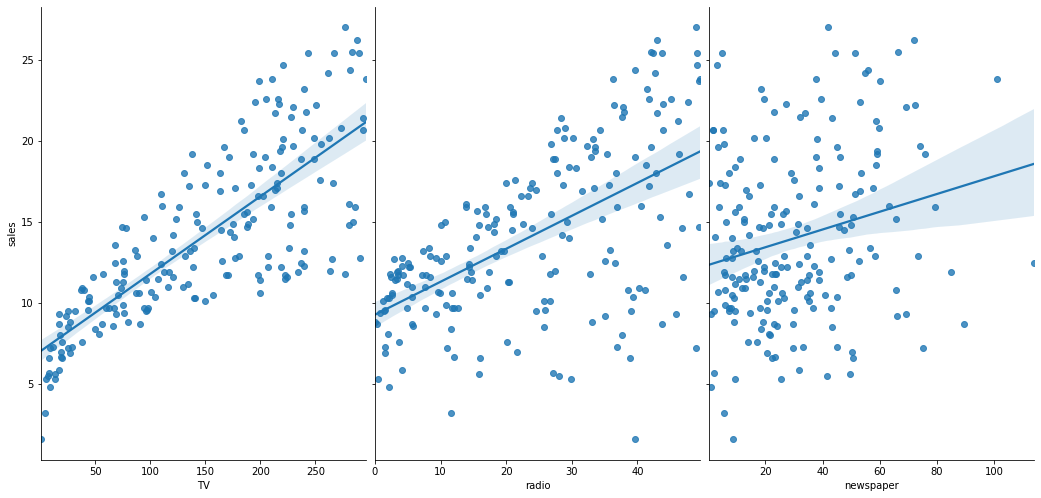

In [15]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg');

In [16]:
data.TV.corr(data.sales)

0.784797105873165

In [17]:
data.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.060047,0.061980,0.784797
radio,0.060047,1.000000,0.350855,0.577071
newspaper,0.061980,0.350855,1.000000,0.228284
sales,0.784797,0.577071,0.228284,1.000000


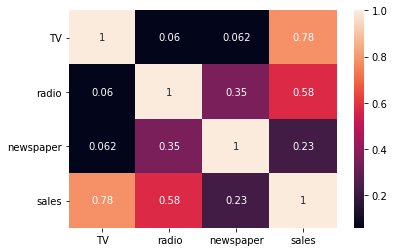

In [18]:
sns.heatmap( data.corr(), annot=True );

In [20]:

X = data[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:

# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(199, 1)


In [22]:
y = data.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(199,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 1)
(50, 1)
(149,)
(50,)


In [26]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [27]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

7.122226253609551
[0.04670496]


In [28]:
zip(data.TV, linreg.coef_)

In [29]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [30]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [31]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [32]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


## Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [33]:
# calculate RMSE by hand
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [34]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.1798692587819466
